In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    # to prevent error with imdb.load_data with numpy 1.16.3
    !pip install numpy==1.16.1 --force-reinstall

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras import regularizers
import numpy as np

Using TensorFlow backend.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import os
if not os.path.isdir('data'):
    os.mkdir('data')

In [5]:
max_features = 10000 
maxlen = 500 
batch_size = 32

In [6]:
np.random.seed(1974)
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)    
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [7]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train, y_train = unison_shuffled_copies(input_train, y_train)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [8]:
print(input_train.shape)
print(input_train[0])

(25000,)
[1, 14, 20, 839, 1674, 8, 61, 523, 308, 3338, 66, 697, 89, 8, 79, 8, 2, 3385, 940, 14, 389, 431, 121, 113, 9, 2395, 143, 4, 330, 5, 483, 7, 4196, 75, 1974, 39, 58, 8, 58, 19, 4, 339, 7, 2728, 5, 1020, 907, 40, 308, 15, 60, 392, 2373, 40, 4196, 28, 6, 483, 13, 43, 426, 570, 61, 1674, 60, 151, 4, 22, 47, 6, 654, 130, 14, 9, 87, 103, 3086, 7, 108, 13, 219, 143, 61, 113, 4196, 66, 2842, 72, 1685, 14, 9, 103, 4, 1558, 2, 4, 333, 431, 15, 66, 679, 72, 6805, 180]


In [9]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [10]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6078 - acc: 0.6676 - val_loss: 0.5235 - val_acc: 0.7350
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3869 - acc: 0.8368 - val_loss: 0.3534 - val_acc: 0.8520
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2947 - acc: 0.8845 - val_loss: 0.3963 - val_acc: 0.8280
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2365 - acc: 0.9113 - val_loss: 0.3699 - val_acc: 0.8684
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2007 - acc: 0.9231 - val_loss: 0.4060 - val_acc: 0.8360
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1633 - acc: 0.9411 - val_loss: 0.3917 - val_acc: 0.8594
Epoch 7/1

#one experiment...
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001,
                             verbose=True)
checkpoint = ModelCheckpoint('weights.lstm.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = Sequential()
model.add(Embedding(max_features, 32, 
                    embeddings_regularizer=regularizers.l2(0.001)))
model.add(LSTM(32, 
               dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model.compile(optimizer=Adam(lr=0.002),
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=128,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

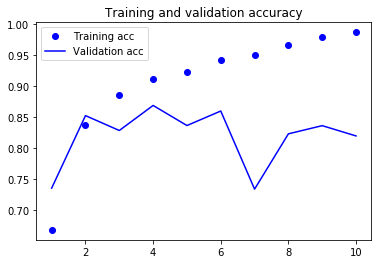

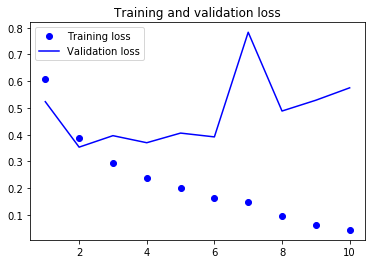

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
from keras.layers import LSTM, Bidirectional

In [14]:
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint('data/weights.lstm.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = Sequential()
model.add(Embedding(max_features, 32, 
                    embeddings_regularizer=regularizers.l2(0.001)))
model.add(LSTM(32, 
               dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model.compile(optimizer=Adam(lr=0.002),
            #loss='binary_crossentropy',
            loss='mean_squared_error',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=128,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 71s 4ms/step - loss: 0.2330 - acc: 0.6948 - val_loss: 0.1925 - val_acc: 0.7914

Epoch 00001: val_acc improved from -inf to 0.79140, saving model to data/weights.lstm.best.hdf5
Epoch 2/100
20000/20000 [==============================] - 70s 3ms/step - loss: 0.1995 - acc: 0.7915 - val_loss: 0.2068 - val_acc: 0.7842

Epoch 00002: val_acc did not improve from 0.79140
Epoch 3/100
20000/20000 [==============================] - 70s 4ms/step - loss: 0.2522 - acc: 0.7022 - val_loss: 0.2079 - val_acc: 0.7668

Epoch 00003: val_acc did not improve from 0.79140
Epoch 4/100
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2249 - acc: 0.7399 - val_loss: 0.2039 - val_acc: 0.7864

Epoch 00004: val_acc did not improve from 0.79140
Epoch 5/100
20000/20000 [=========

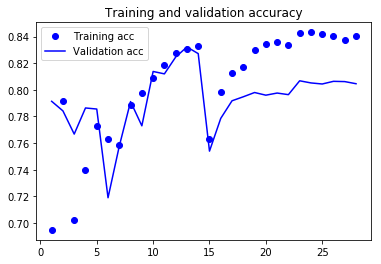

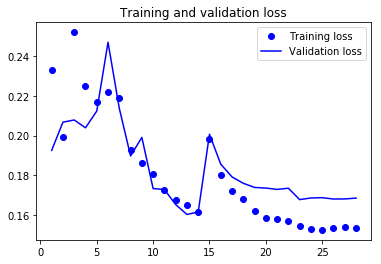

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## BiLSTM

In [16]:
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001,
                             verbose=True)
checkpoint = ModelCheckpoint('data/weights.bilstm.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model = Sequential()
model.add(Embedding(max_features, 32, 
                    embeddings_regularizer=regularizers.l2(0.001)))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.2, dropout=0.2)))
model.add(Dense(1, activation='sigmoid', 
                kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))

model.compile(optimizer=Adam(lr=0.001),
            #loss='binary_crossentropy',
            loss='mean_squared_error',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=128,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 109s 5ms/step - loss: 0.2552 - acc: 0.6518 - val_loss: 0.2005 - val_acc: 0.7828

Epoch 00001: val_acc improved from -inf to 0.78280, saving model to data/weights.bilstm.best.hdf5
Epoch 2/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1844 - acc: 0.7940 - val_loss: 0.1650 - val_acc: 0.8182

Epoch 00002: val_acc improved from 0.78280 to 0.81820, saving model to data/weights.bilstm.best.hdf5
Epoch 3/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1806 - acc: 0.8068 - val_loss: 0.1814 - val_acc: 0.7976

Epoch 00003: val_acc did not improve from 0.81820
Epoch 4/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1754 - acc: 0.8138 - val_loss: 0.1685 - val_acc: 0.8200

Epoch 00004: val_acc improved from 0.81820 to 0.82000, saving model to data/weights.bilstm.best.hdf5
Epoch 5/100
20000/20000 [================

20000/20000 [==============================] - 106s 5ms/step - loss: 0.1068 - acc: 0.9044 - val_loss: 0.1429 - val_acc: 0.8422

Epoch 00040: val_acc did not improve from 0.84460
Epoch 41/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1078 - acc: 0.9039 - val_loss: 0.1425 - val_acc: 0.8432

Epoch 00041: val_acc did not improve from 0.84460
Epoch 42/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1084 - acc: 0.9005 - val_loss: 0.1421 - val_acc: 0.8432

Epoch 00042: val_acc did not improve from 0.84460
Epoch 43/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1085 - acc: 0.9005 - val_loss: 0.1423 - val_acc: 0.8422

Epoch 00043: val_acc did not improve from 0.84460
Epoch 44/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1077 - acc: 0.9012 - val_loss: 0.1422 - val_acc: 0.8424

Epoch 00044: val_acc did not improve from 0.84460
Epoch 45/100
20000/20000 [==============================] 

20000/20000 [==============================] - 106s 5ms/step - loss: 0.1018 - acc: 0.9093 - val_loss: 0.1422 - val_acc: 0.8394

Epoch 00083: val_acc did not improve from 0.84460
Epoch 84/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1023 - acc: 0.9081 - val_loss: 0.1417 - val_acc: 0.8404

Epoch 00084: val_acc did not improve from 0.84460
Epoch 85/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1025 - acc: 0.9059 - val_loss: 0.1415 - val_acc: 0.8418

Epoch 00085: val_acc did not improve from 0.84460
Epoch 86/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1020 - acc: 0.9086 - val_loss: 0.1421 - val_acc: 0.8388

Epoch 00086: val_acc did not improve from 0.84460
Epoch 87/100
20000/20000 [==============================] - 106s 5ms/step - loss: 0.1025 - acc: 0.9074 - val_loss: 0.1419 - val_acc: 0.8390

Epoch 00087: val_acc did not improve from 0.84460
Epoch 88/100
20000/20000 [==============================] 

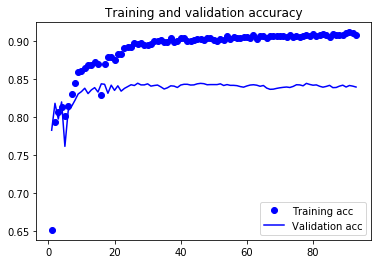

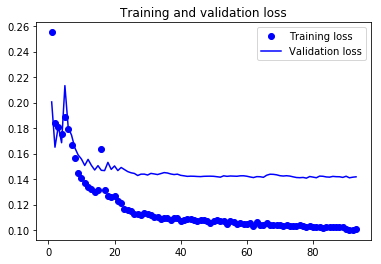

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# CNN

In [18]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop, Adam

In [19]:
early_stopping=EarlyStopping(monitor='val_loss', patience=15)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001,
                             verbose=True)
checkpoint = ModelCheckpoint('data/weights.cnn.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

l2 = 0.001
dout = 0.4

model = Sequential()
model.add(layers.Embedding(max_features, 64, input_length=maxlen, embeddings_regularizer=regularizers.l2(l2)))
model.add(layers.Dropout(dout))
model.add(layers.Conv1D(64, 7, activation='relu', 
                        kernel_regularizer=regularizers.l2(l2)))
model.add(layers.MaxPooling1D(5))
model.add(layers.Dropout(dout))
model.add(layers.Conv1D(32, 7, activation='relu', kernel_regularizer=regularizers.l2(l2)))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(dout))
model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(l2)))
model.summary()
model.compile(optimizer=Adam(lr=1e-4),
            #loss='binary_crossentropy',
            loss='mean_squared_error',
            metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=100,
            batch_size=16,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr, checkpoint])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 64)           28736     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 98, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            14368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
__________

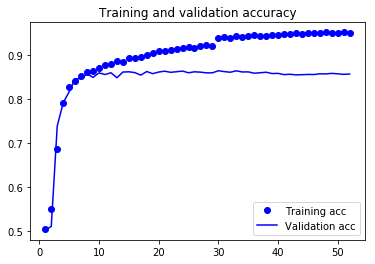

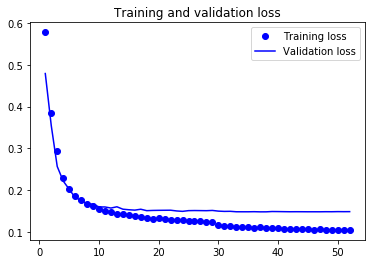

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()